In [17]:
import pandas as pd # Pandas é uma biblioteca de manipulação de dados
import matplotlib.pyplot as plt # Matplotlib é uma biblioteca de plotagem de gráficos
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados baseada no Matplotlib
import numpy as np # Numpy é uma biblioteca de manipulação de arrays

In [18]:
# Reset do display do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

In [19]:
# Criando um dataframe a partir do arquivo exportado através do excel como CSV.
df = pd.read_csv('dataset/funcionarios_dataset.csv')

In [20]:
# Exibindo as primeiras linhas do dataframe
print(df.head())

   Funcionario Estado civil   Grau de Instrucao  No. de filhos  Salario xmin  Anos  Meses    Regiao
0            1     solteiro  Ensino Fundamental            NaN          4.00    26      3  interior
1            2       casado  Ensino Fundamental            1.0          4.56    32     10   capital
2            3       casado  Ensino Fundamental            2.0          5.25    36      5   capital
3            4     solteiro        Ensino Médio            NaN          5.73    20     10     outro
4            5     solteiro  Ensino Fundamental            NaN          6.26    40      7     outro


In [21]:
# Alterando o nome das colunas para snake_case, para facilitar a manipulação dos dados
df.rename(columns={'Funcionario': 'funcionario', 'Estado civil': 'estado_civil', 'Grau de Instrucao': 'grau_instrucao',
                   'No. de filhos': 'qtd_filhos', 'Salario xmin': 'salarios_minimos', 'Anos': 'anos',
                   'Meses': 'meses', 'Regiao': 'regiao'}, inplace=True)

In [22]:
# Trocar valores NA por 0 na coluna qtd_filhos
df.fillna({'qtd_filhos': 0}, inplace=True)

# Alterar valores qtd_filhos para inteiro, pois o pandas leu como float
df['qtd_filhos'] = df['qtd_filhos'].astype(int)

In [23]:
# Criar variável idade, que será igual a anos + meses/12, e remover as colunas anos e meses
df['idade'] = df['anos'] + df['meses']/12
df.drop(columns=['anos', 'meses'], inplace=True)

### Categorização das Variáveis

- funcionario: Variável qualitativa (nominal) - representa um identificador único para cada funcionário.

- estado_civil: Variável qualitativa (nominal) - representa o estado civil do funcionário.

- grau_instrucao: Variável qualitativa (ordinal) - representa o nível de instrução do funcionário.

- qtd_filhos: Variável quantitativa (discreta) - representa o número de filhos do funcionário.

- salarios_minimos: Variável quantitativa (contínua) - representa o salário do funcionário.

- idade: Variável quantitativa (discreta) - representa a idade do funcionário

- regiao: Variável qualitativa (nominal) - representa a região onde o funcionário está localizado.

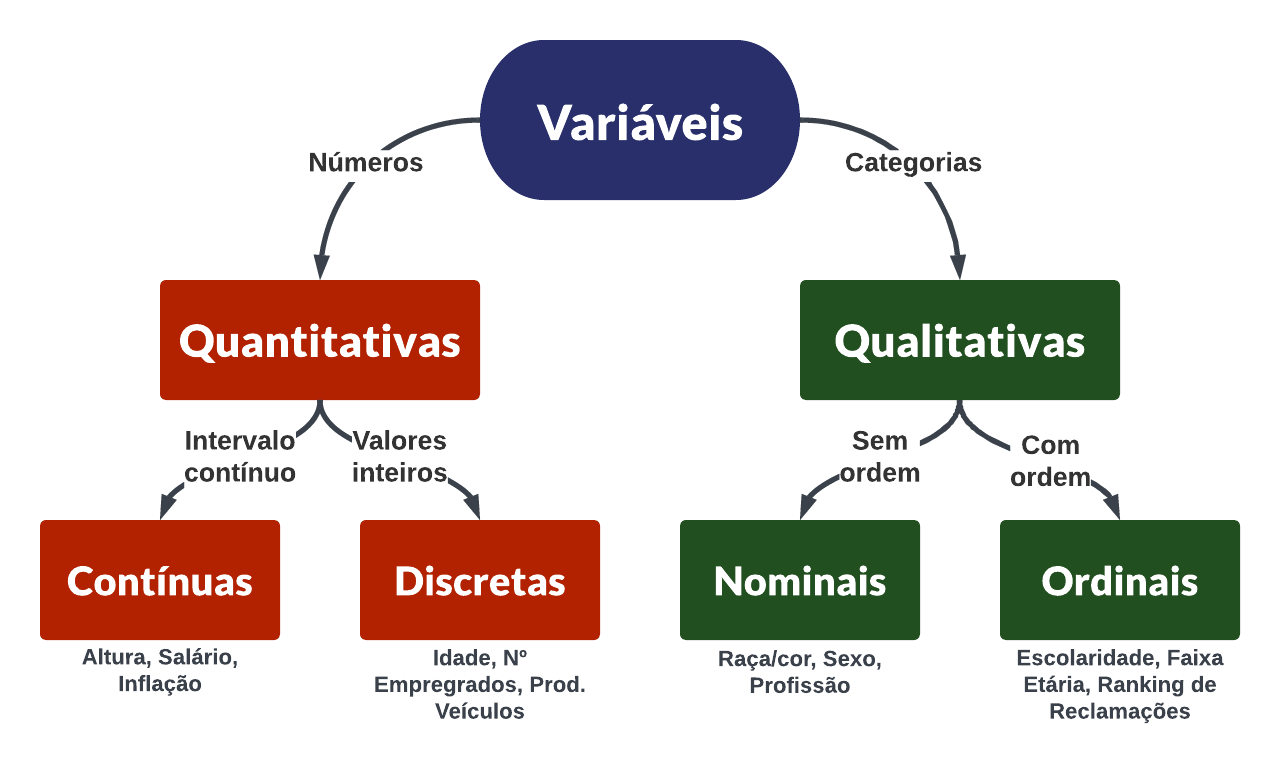


# Análise Univariada dos Dados

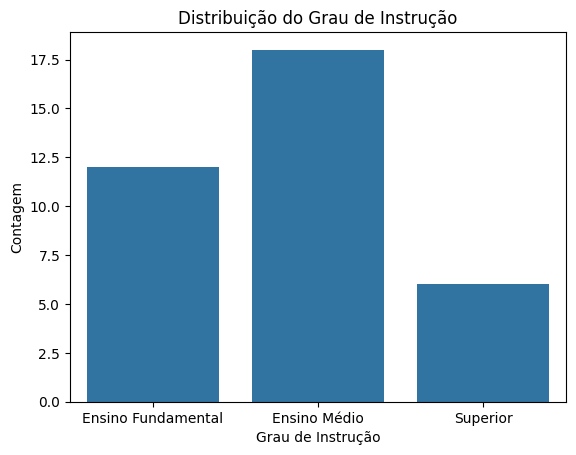

In [24]:
# Contagem do Grau de Instrução dos funcionários
# Os gráficos de contagem são úteis para visualizar a distribuição de variáveis qualitativas, como é o caso da variável grau_instrucao.

sns.countplot(x='grau_instrucao', data=df)
plt.title('Distribuição do Grau de Instrução')
plt.xlabel('Grau de Instrução')
plt.ylabel('Contagem')
plt.show()

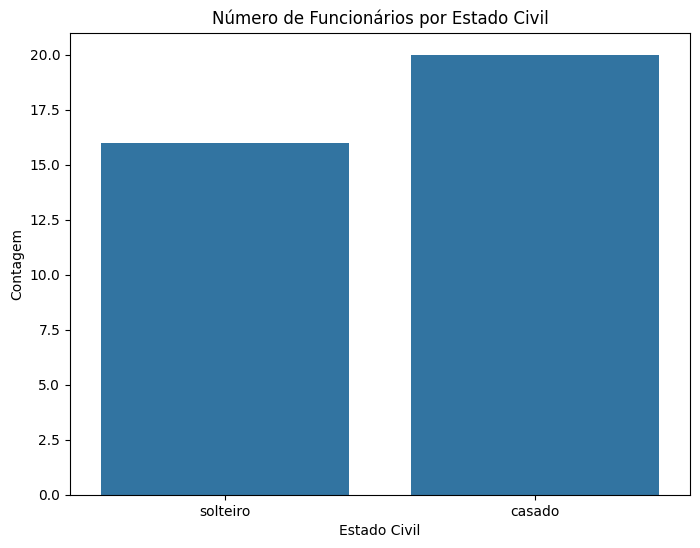

In [25]:
# Contagem de funcionários por estado civil

plt.figure(figsize=(8, 6))
sns.countplot(x='estado_civil', data=df)
plt.title('Número de Funcionários por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.show()

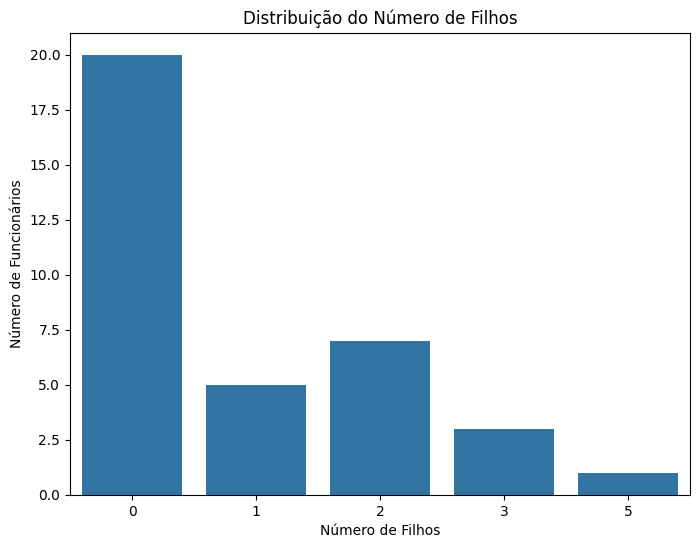

In [26]:
# Contagem de Funcionários com número X de filhos

plt.figure(figsize=(8, 6))
sns.countplot(x='qtd_filhos', data=df)
plt.title('Distribuição do Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Número de Funcionários')
plt.show()

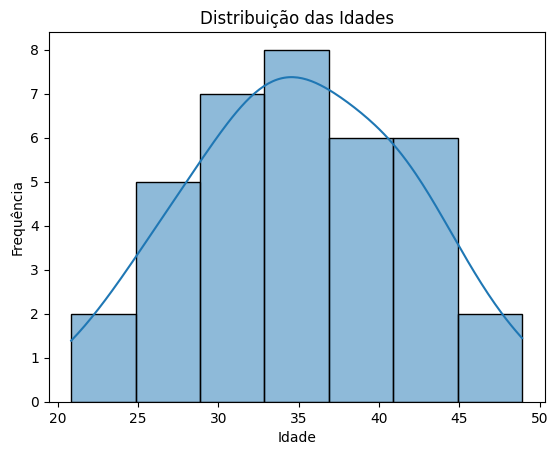

In [27]:
# Histograma da Idade
# Histograma (Gráfico de Barras que demonstra uma distribuição de frequências) + KDE (Kernel Density Estimation), 
# são usados para visualizar a distribuição de variáveis quantitativas.

sns.histplot(df['idade'], kde=True) 
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

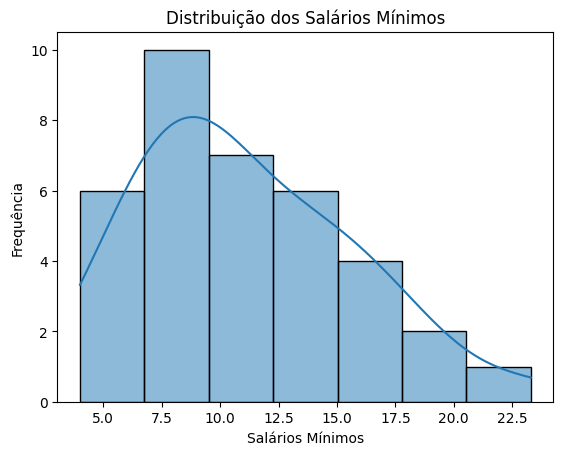

In [28]:
# Distribuição de idades dos funcionários
salarios_min = df['salarios_minimos']
sns.histplot(salarios_min, kde=True)
plt.title('Distribuição dos Salários Mínimos')
plt.xlabel('Salários Mínimos')
plt.ylabel('Frequência')
plt.show()

# Análise Bivariada dos Dados

                    count       mean       std    min      25%     50%      75%    max
grau_instrucao                                                                        
Ensino Fundamental   12.0   7.836667  2.956464   4.00   6.0075   7.125   9.1625  13.85
Ensino Médio         18.0  11.528333  3.715144   5.73   8.8375  10.910  14.4175  19.40
Superior              6.0  16.475000  4.502438  10.53  13.6475  16.740  18.3775  23.30
-------------------------
grau_instrucao
Ensino Fundamental     7.125
Ensino Médio          10.910
Superior              16.740
Name: salarios_minimos, dtype: float64


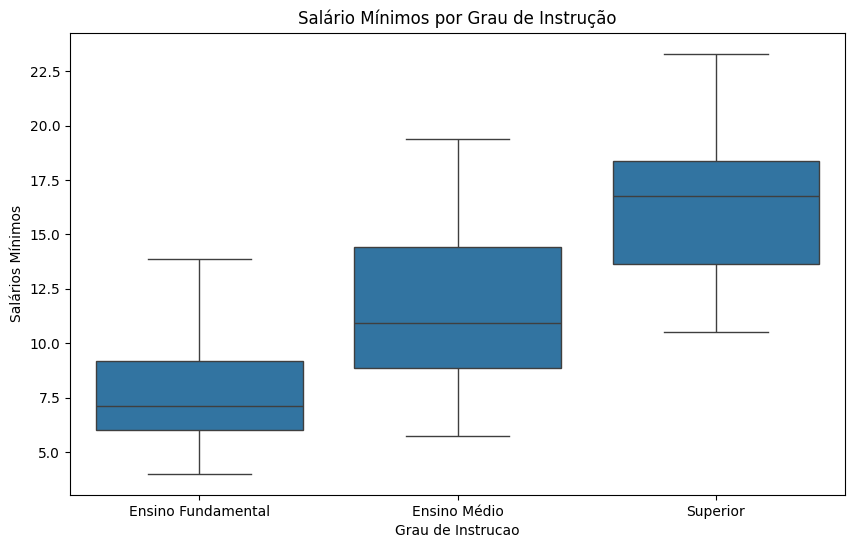

In [29]:
# Boxplot do salário por grau de instrução com média e mediana
# Boxplots são gráficos que apresentam 5 estatísticas resumidas de um conjunto de dados: mínimo, 1º quartil, mediana, 3º quartil e máximo.

# Mínimo: menor valor do conjunto de dados
# 1º quartil: valor que separa o primeiro 25% dos dados
# Mediana: valor que separa 50% dos dados
# 3º quartil: valor que separa o primeiro 75% dos dados
# Máximo: maior valor do conjunto de dados
print(df.groupby('grau_instrucao')['salarios_minimos'].describe())
print("-------------------------")
print(df.groupby('grau_instrucao')['salarios_minimos'].median())


plt.figure(figsize=(10, 6))
sns.boxplot(x='grau_instrucao', y='salarios_minimos', data=df)
plt.title('Salário Mínimos por Grau de Instrução')
plt.xlabel('Grau de Instrucao')
plt.ylabel('Salários Mínimos')
plt.show()

              count       mean       std        min     25%        50%      75%        max
estado_civil                                                                              
casado         20.0  35.629167  5.946673  26.083333  31.375  34.916667  39.8125  48.916667
solteiro       16.0  34.328125  7.688223  20.833333  27.500  35.750000  40.6875  46.583333
-------------------------
estado_civil
casado      34.916667
solteiro    35.750000
Name: idade, dtype: float64


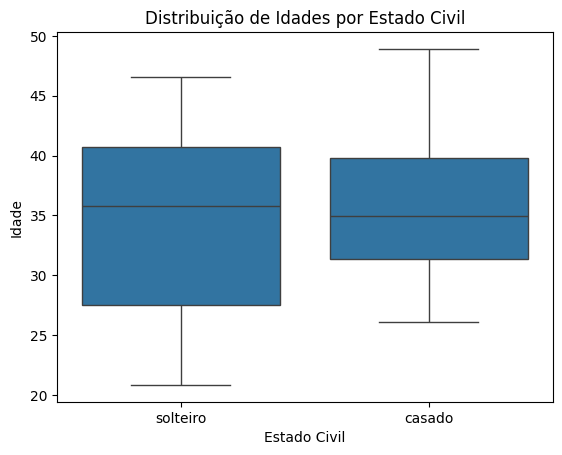

In [34]:
# Distribuição de Idade por Estado Civil
print(df.groupby('estado_civil')['idade'].describe())
print("-------------------------")
print(df.groupby('estado_civil')['idade'].median())


sns.boxplot(x='estado_civil', y='idade', data=df)
plt.title('Distribuição de Idades por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Idade')
plt.show()


          count       mean       std   min    25%     50%     75%    max
regiao                                                                  
capital    11.0  11.455455  5.476653  4.56  7.490   9.770  16.625  19.40
interior   12.0  11.550000  5.296055  4.00  7.805  10.645  14.695  23.30
outro      13.0  10.445385  3.145453  5.73  8.740   9.800  12.790  16.22
-------------------------
regiao
capital      9.770
interior    10.645
outro        9.800
Name: salarios_minimos, dtype: float64


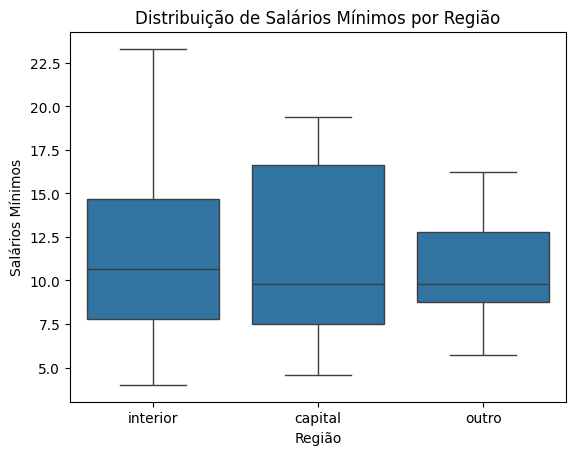

In [39]:
# Boxplot de Salários Mínimos por Região
print(df.groupby('regiao')['salarios_minimos'].describe())
print("-------------------------")
print(df.groupby('regiao')['salarios_minimos'].median())

sns.boxplot(x='regiao', y='salarios_minimos', data=df)
plt.title('Distribuição de Salários Mínimos por Região')
plt.xlabel('Região')
plt.ylabel('Salários Mínimos')
plt.show()

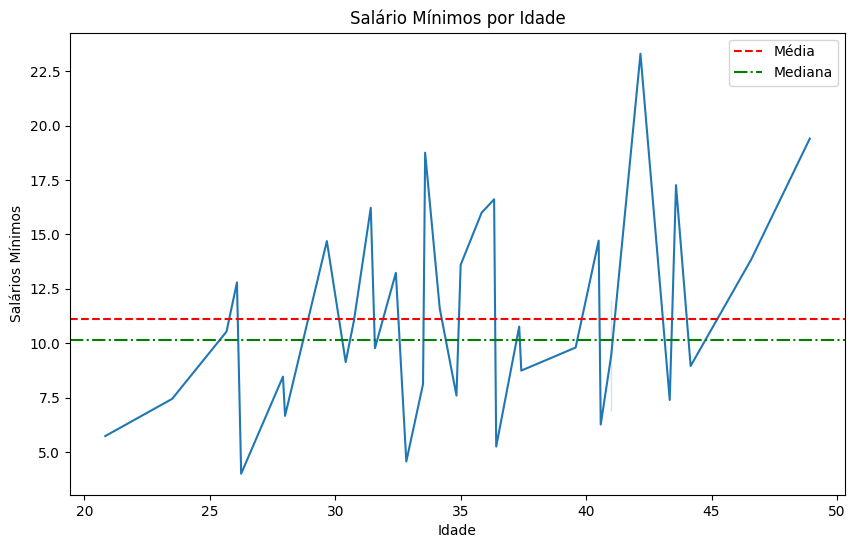

In [38]:
# Salário médio por idade com média e mediana
# Gráficos de linha são úteis para visualizar a relação entre duas variáveis quantitativas.
plt.figure(figsize=(10, 6))
sns.lineplot(x='idade', y='salarios_minimos', data=df)
plt.axhline(y=df['salarios_minimos'].mean(), color='r', linestyle='--', label='Média')
plt.axhline(y=df['salarios_minimos'].median(), color='g', linestyle='-.', label='Mediana')
plt.title('Salário Mínimos por Idade')
plt.xlabel('Idade')
plt.ylabel('Salários Mínimos')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

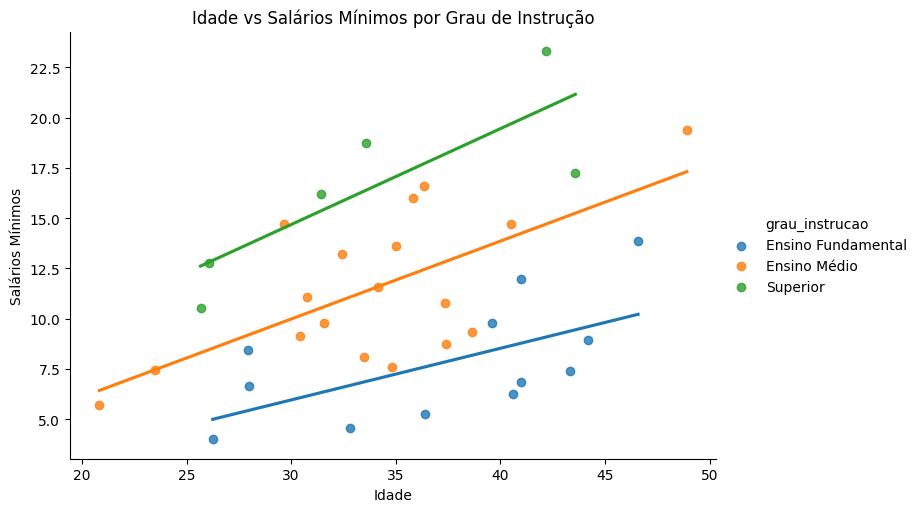

In [32]:
# Gráfico de dispersão de idade vs salários mínimos por grau de instrução
# Gráficos de dispersão são úteis para visualizar a relação entre duas ou mais variáveis quantitativas.
plt.figure(figsize=(10, 6))
sns.lmplot(x='idade', y='salarios_minimos', hue='grau_instrucao', data=df, aspect=1.5, ci=None)
plt.title('Idade vs Salários Mínimos por Grau de Instrução')
plt.xlabel('Idade')
plt.ylabel('Salários Mínimos')
plt.show()


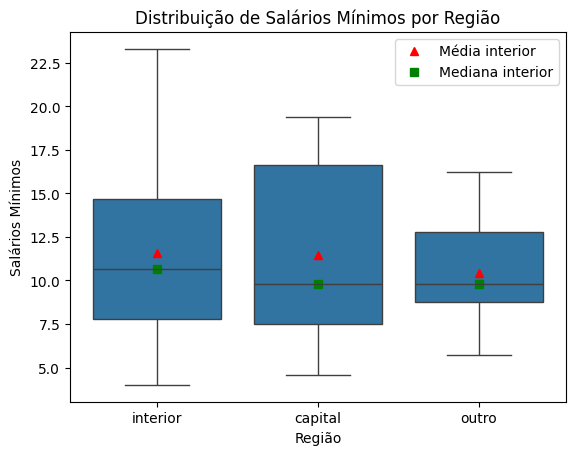